<h1><center>Titanic: Machine Learning with Disaster (Novice level)</center></h1>

I am very new to Data Science and would like to take this competition as my stepping stone to be better at Data Science!

**Contents**:
1. Problem Statement
2. Import Necessary Libraries
3. Collecting Data
4. Data Analysis
5. Data Visualization
6. Cleaning Data
7. Choosing the Best Model
8. Creating Submission File

<h3><center>1.  Problem Statement </center></h3>

<p style="text-align:justify">The task is to complete the analysis of what sorts of people were likely to survive, using the tools of machine learning to predict which passengers survived the tragedy.</p>

<h3><center>2. Import Necessary Libraries</center></h3>

Import libraries required to solve the problem 

In [842]:
#Data analysis libraries
import numpy as np
import pandas as pd

#Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3><center>3. Collecting Data</center></h3>

In [843]:
#Data can be collected from Kaggle (https://www.kaggle.com/c/titanic/data)

#Import train and test CSV
train = pd.read_csv("/Users/xunister/Desktop/Data Science/Titanic/Titanic Data/train.csv")
test = pd.read_csv("/Users/xunister/Desktop/Data Science/Titanic/Titanic Data/test.csv")

#An initial look at the training data set
train.describe(include="all")

PassengerId    Survived      Pclass                       Name   Sex  \
count    891.000000  891.000000  891.000000                        891   891   
unique          NaN         NaN         NaN                        891     2   
top             NaN         NaN         NaN  Davies, Mr. Charles Henry  male   
freq            NaN         NaN         NaN                          1   577   
mean     446.000000    0.383838    2.308642                        NaN   NaN   
std      257.353842    0.486592    0.836071                        NaN   NaN   
min        1.000000    0.000000    1.000000                        NaN   NaN   
25%      223.500000    0.000000    2.000000                        NaN   NaN   
50%      446.000000    0.000000    3.000000                        NaN   NaN   
75%      668.500000    1.000000    3.000000                        NaN   NaN   
max      891.000000    1.000000    3.000000                        NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare Cabin  \
count   714.000000  891.000000  891.000000       891  891.000000   204   
unique         NaN         NaN         NaN       681         NaN   147   
top            NaN         NaN         NaN  CA. 2343         NaN    G6   
freq           NaN         NaN         NaN         7         NaN     4   
mean     29.699118    0.523008    0.381594       NaN   32.204208   NaN   
std      14.526497    1.102743    0.806057       NaN   49.693429   NaN   
min       0.420000    0.000000    0.000000       NaN    0.000000   NaN   
25%      20.125000    0.000000    0.000000       NaN    7.910400   NaN   
50%      28.000000    0.000000    0.000000       NaN   14.454200   NaN   
75%      38.000000    1.000000    0.000000       NaN   31.000000   NaN   
max      80.000000    8.000000    6.000000       NaN  512.329200   NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

<h3><center>4. Data Analysis </center></h3>

In [844]:
#A look at the list of features in the training data set

print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [845]:
#A look at the type of features in the training data sert

train.sample(5)

PassengerId  Survived  Pclass                                   Name  \
824          825         0       3           Panula, Master. Urho Abraham   
304          305         0       3      Williams, Mr. Howard Hugh "Harry"   
543          544         1       2                      Beane, Mr. Edward   
681          682         1       1                     Hassab, Mr. Hammad   
182          183         0       3  Asplund, Master. Clarence Gustaf Hugo   

      Sex   Age  SibSp  Parch    Ticket     Fare Cabin Embarked  
824  male   2.0      4      1   3101295  39.6875   NaN        S  
304  male   NaN      0      0  A/5 2466   8.0500   NaN        S  
543  male  32.0      1      0      2908  26.0000   NaN        S  
681  male  27.0      0      0  PC 17572  76.7292   D49        C  
182  male   9.0      4      2    347077  31.3875   NaN        S

 - **Numerical Features**: Age (Continuous), Fare (Continuous), SipSp (Discrete), Parch (Discrete)
 - **Categorical Features**: Survived, Sex, Embarked, Pclass
 - **Alphanumeric Features**: Ticket, Cabin
 
 
 **Age**: Float  
 **Fare**: Float  
 **SipSp**: Integer  
 **Parch**: Integer  
 **Survived**: Integer  
 **Sex**: String  
 **Embarked**: String  
 **Pclass**: Integer  
 **Ticket**: String  
 **Cabin**: String  
 **Name**: String  
 **PassengerId**: Integer  

**Observation of the data**:  
There are a total of 891 passengers in Titanic.  
The Age column is missing of 177 values, approximately 19.8% of the total dataset.  
The Cabin column is missing of 687 values, approximately 77.1% of the total dataset.  
The Embarked column is missing of 2 values, approximately 0.2% of the total datast.  

As there is a huge number of missing values under Cabin column, we may disregard this column for our analysis.  

We will attempt to fill up the missing values of Age column as age seems to be an important factor.

In [846]:
#Include the rest of the missing values with the median age.

train['Age'] = train['Age'].fillna(train['Age'].median())

train.describe(include="all")

PassengerId    Survived      Pclass                       Name   Sex  \
count    891.000000  891.000000  891.000000                        891   891   
unique          NaN         NaN         NaN                        891     2   
top             NaN         NaN         NaN  Davies, Mr. Charles Henry  male   
freq            NaN         NaN         NaN                          1   577   
mean     446.000000    0.383838    2.308642                        NaN   NaN   
std      257.353842    0.486592    0.836071                        NaN   NaN   
min        1.000000    0.000000    1.000000                        NaN   NaN   
25%      223.500000    0.000000    2.000000                        NaN   NaN   
50%      446.000000    0.000000    3.000000                        NaN   NaN   
75%      668.500000    1.000000    3.000000                        NaN   NaN   
max      891.000000    1.000000    3.000000                        NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare Cabin  \
count   891.000000  891.000000  891.000000       891  891.000000   204   
unique         NaN         NaN         NaN       681         NaN   147   
top            NaN         NaN         NaN  CA. 2343         NaN    G6   
freq           NaN         NaN         NaN         7         NaN     4   
mean     29.361582    0.523008    0.381594       NaN   32.204208   NaN   
std      13.019697    1.102743    0.806057       NaN   49.693429   NaN   
min       0.420000    0.000000    0.000000       NaN    0.000000   NaN   
25%      22.000000    0.000000    0.000000       NaN    7.910400   NaN   
50%      28.000000    0.000000    0.000000       NaN   14.454200   NaN   
75%      35.000000    1.000000    0.000000       NaN   31.000000   NaN   
max      80.000000    8.000000    6.000000       NaN  512.329200   NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [847]:
#Check for any unusable data columns

print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


It can be seen that other than Cabin and Embarked features, there are no NaN values.  
We have filled up the NaN values of Age feature with the median age for now.

<h3><center>5. Data Visualization</center></h3>

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


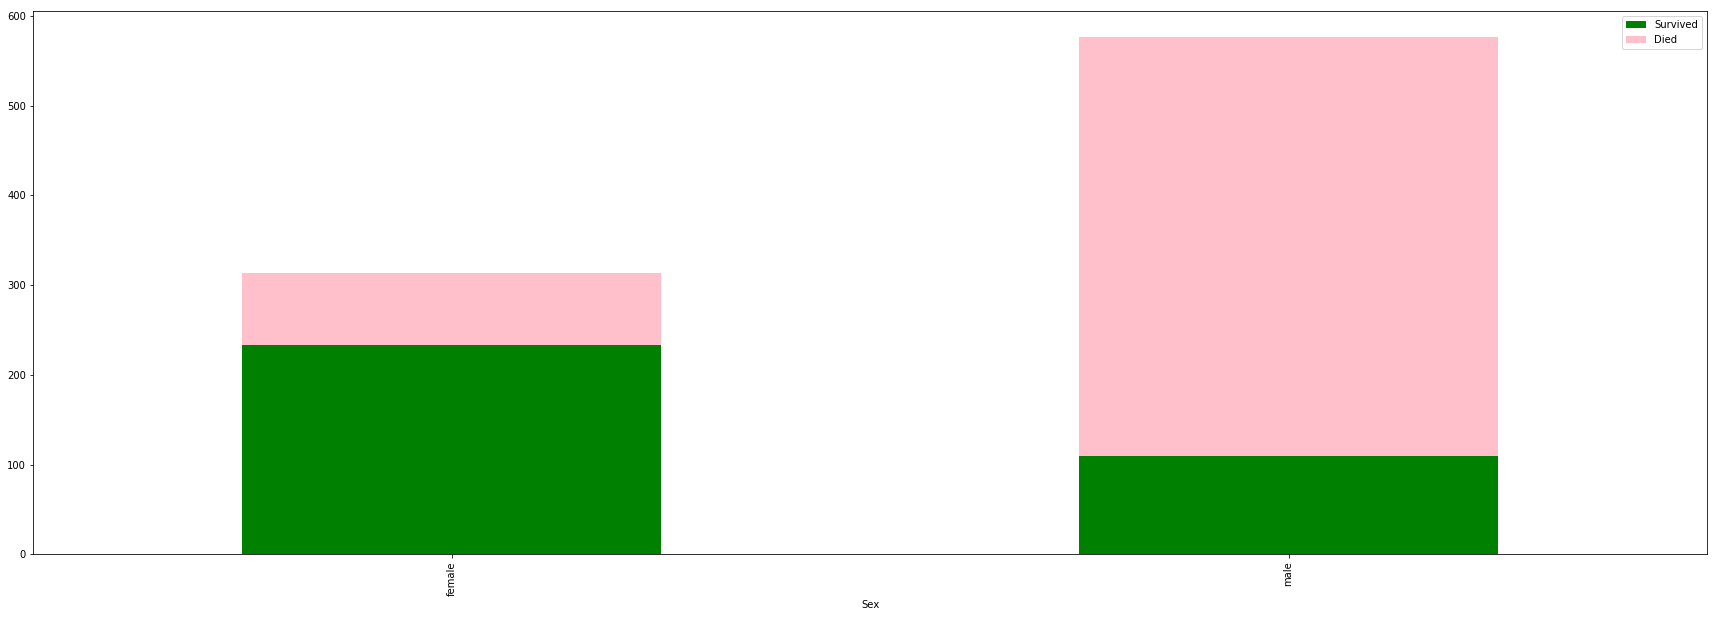

In [848]:
#Visualization based on sum of passengers by gender

train['Died'] = 1 - train['Survived']

train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(30, 10),
                                                          stacked=True, color=['green', 'pink']);

print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)


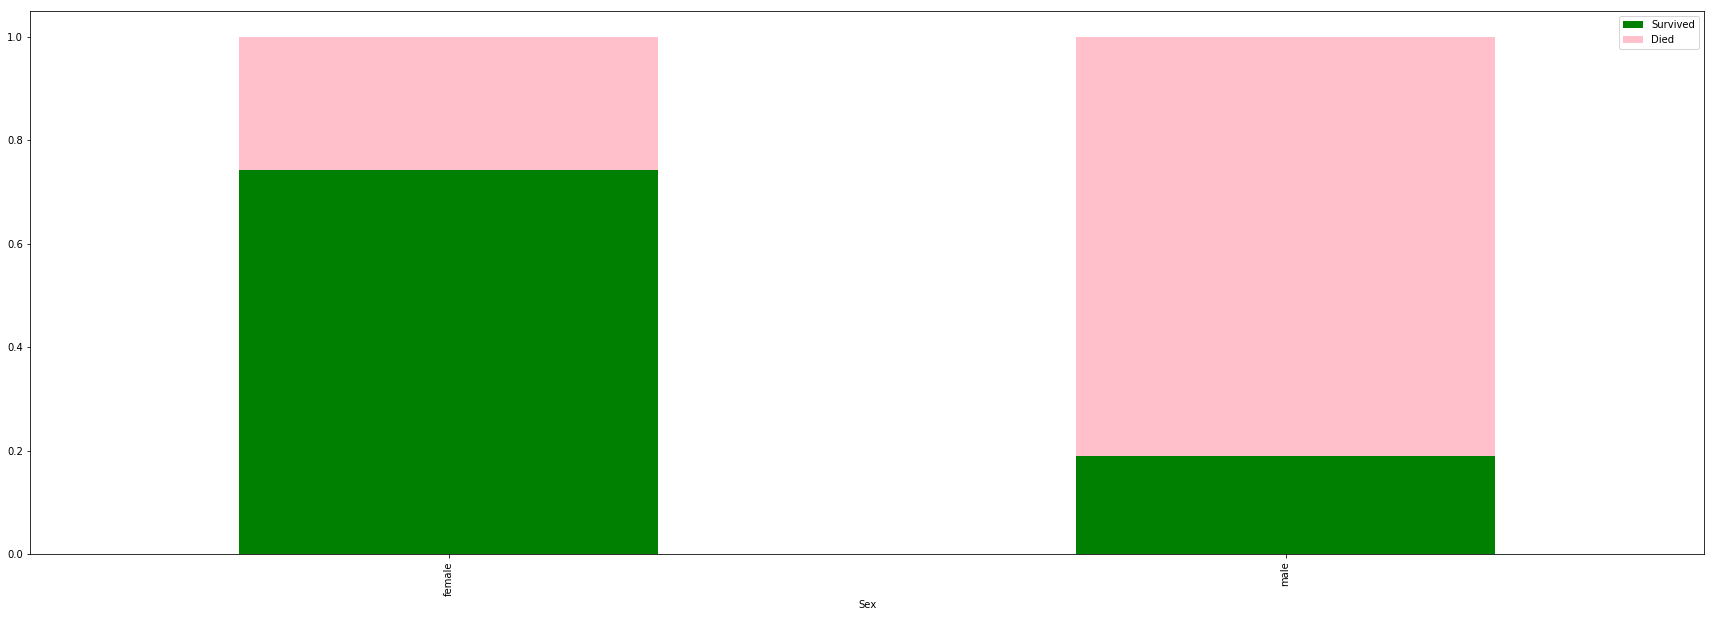

In [849]:
#Visualization based on the ratio of passengers by gender

train.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(30, 10),
                                                          stacked=True, color=['green', 'pink']);

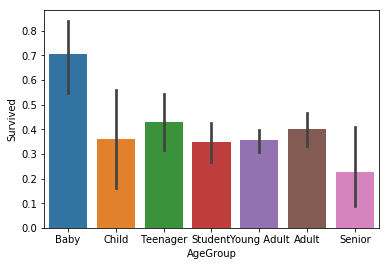

In [850]:
#Visualization based on the age by categories

bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)



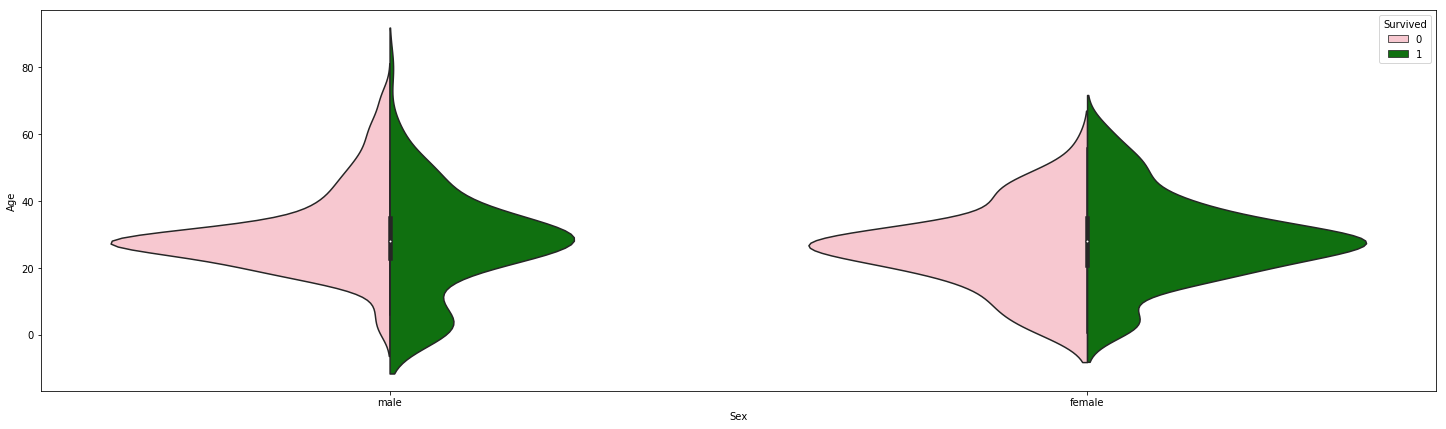

In [851]:
#Visualization based on the age by gender


fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, split=True, palette={0: "pink", 1: "g"}
              );

From the visualization based on age by category and gender, it seemed that babies and women are more likely to survive the Titanic Disaster.

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


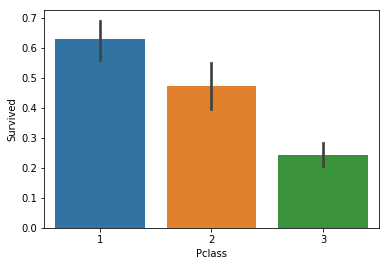

In [852]:
#Visualization based on Pclass

#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

From the visualization based on Pclass, it seemed that passengers with higher socio-economic status (SES) are more likely to survive the Titanic Disaster.

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0
Percentage of SibSp = 4 who survived: 16.666666666666664


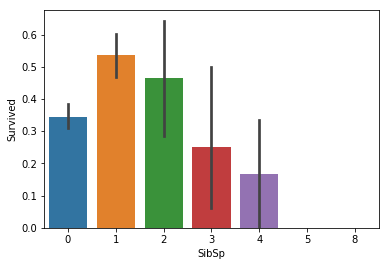

In [853]:
#Visualization based on siblings and spouses

#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 3 who survived:", train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 4 who survived:", train["Survived"][train["SibSp"] == 4].value_counts(normalize = True)[1]*100)


People with 1 or 2 siblings or spouses are more likely to survive than the rest.

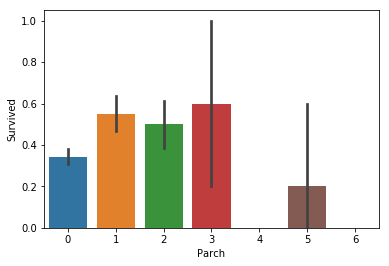

In [854]:
#Visualization based on family relations

sns.barplot(x="Parch", y="Survived", data=train)

People with less than 4 related kins are more likely to survive. However, people who are travelling alone are also less likely to survive.

<h3><center>6. Cleaning Data</center></h3>

In [855]:
#An initial look at the test data set
test.describe(include="all")

PassengerId      Pclass                Name   Sex         Age  \
count    418.000000  418.000000                 418   418  332.000000   
unique          NaN         NaN                 418     2         NaN   
top             NaN         NaN  Khalil, Mr. Betros  male         NaN   
freq            NaN         NaN                   1   266         NaN   
mean    1100.500000    2.265550                 NaN   NaN   30.272590   
std      120.810458    0.841838                 NaN   NaN   14.181209   
min      892.000000    1.000000                 NaN   NaN    0.170000   
25%      996.250000    1.000000                 NaN   NaN   21.000000   
50%     1100.500000    3.000000                 NaN   NaN   27.000000   
75%     1204.750000    3.000000                 NaN   NaN   39.000000   
max     1309.000000    3.000000                 NaN   NaN   76.000000   

             SibSp       Parch    Ticket        Fare            Cabin  \
count   418.000000  418.000000       418  417.000000               91   
unique         NaN         NaN       363         NaN               76   
top            NaN         NaN  PC 17608         NaN  B57 B59 B63 B66   
freq           NaN         NaN         5         NaN                3   
mean      0.447368    0.392344       NaN   35.627188              NaN   
std       0.896760    0.981429       NaN   55.907576              NaN   
min       0.000000    0.000000       NaN    0.000000              NaN   
25%       0.000000    0.000000       NaN    7.895800              NaN   
50%       0.000000    0.000000       NaN   14.454200              NaN   
75%       1.000000    0.000000       NaN   31.500000              NaN   
max       8.000000    9.000000       NaN  512.329200              NaN   

       Embarked     AgeGroup  
count       418          332  
unique        3            7  
top           S  Young Adult  
freq        270           96  
mean        NaN          NaN  
std         NaN          NaN  
min         NaN          NaN  
25%         NaN          NaN  
50%         NaN          NaN  
75%         NaN          NaN  
max         NaN          NaN

**Observation of the data**:  
There are a total of 418 passengers for test set.  
The Age column is missing of 86 values, approximately 20.5% of the total dataset.  
The Cabin column is missing of 327 values, approximately 78.2% of the total dataset.  
The Fare column is missing of 1 value, approximately 0.2% of the total dataset.  
The AgeGroup column is missing of 86 values, approximately 20.5% of the total dataset.

In [856]:
#Features that we can drop for now include "Cabin", "Ticket"
train = pd.read_csv("/Users/xunister/Desktop/Data Science/Titanic/Titanic Data/train.csv")
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

To handle the number of missing ages in train and test set, a combined group of both data sets are used.

In [857]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [858]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.285714
5   Royal  1.000000

In [859]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked     AgeGroup  Title  
0      0   7.2500        S      Student      1  
1      0  71.2833        C        Adult      3  
2      0   7.9250        S  Young Adult      2  
3      0  53.1000        S  Young Adult      3  
4      0   8.0500        S  Young Adult      1

Next, we will try to fill up the missing age.

In [860]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#train = train.fillna({"AgeGroup": train["Title"].map(age_title_mapping)})
#test = test.fillna({"AgeGroup": test["Title"].map(age_title_mapping)})


for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [861]:
test

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
..           ...     ...                                                ...   
388         1280       3                               Canavan, Mr. Patrick   
389         1281       3                        Palsson, Master. Paul Folke   
390         1282       1                         Payne, Mr. Vivian Ponsonby   
391         1283       1     Lines, Mrs. Ernest H (Elizabeth Lindsey James)   
392         1284       3                      Abbott, Master. Eugene Joseph   
393         1285       2                               Gilbert, Mr. William   
394         1286       3                           Kink-Heilmann, Mr. Anton   
395         1287       1     Smith, Mrs. Lucien Philip (Mary Eloise Hughes)   
396         1288       3                               Colbert, Mr. Patrick   
397         1289       1  Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...   
398         1290       3                     Larsson-Rondberg, Mr. Edvard A   
399         1291       3                           Conlon, Mr. Thomas Henry   
400         1292       1                            Bonnell, Miss. Caroline   
401         1293       2                                    Gale, Mr. Harry   
402         1294       1                     Gibson, Miss. Dorothy Winifred   
403         1295       1                             Carrau, Mr. Jose Pedro   
404         1296       1                       Frauenthal, Mr. Isaac Gerald   
405         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
406         1298       2                          Ware,

In [807]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex          Age  \
0                              Braund, Mr. Owen Harris    male           22   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female           38   
2                               Heikkinen, Miss. Laina  female           26   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female           35   
4                             Allen, Mr. William Henry    male           35   
5                                     Moran, Mr. James    male  Young Adult   
6                              McCarthy, Mr. Timothy J    male           54   
7                       Palsson, Master. Gosta Leonard    male            2   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female           27   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female           14   
10                     Sandstrom, Miss. Marguerite Rut  female            4   
11                            Bonnell, Miss. Elizabeth  female           58   
12                      Saundercock, Mr. William Henry    male           20   
13                         Andersson, Mr. Anders Johan    male           39   
14                Vestrom, Miss. Hulda Amanda Adolfina  female           14   
15                    Hewlett, Mrs. (Mary D Kingcome)   female           55   
16                                Rice, Master. Eugene    male            2   
17                        Williams, Mr. Charles Eugene    male  Young Adult   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female           31   
19                             Masselmani, Mrs. Fatima  female      

Afterwhich, we will try to map each age group to a numerical value.

In [808]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [809]:
test

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
..           ...     ...                                                ...   
388         1280       3                               Canavan, Mr. Patrick   
389         1281       3                        Palsson, Master. Paul Folke   
390         1282       1                         Payne, Mr. Vivian Ponsonby   
391         1283       1     Lines, Mrs. Ernest H (Elizabeth Lindsey James)   
392         1284       3                      Abbott, Master. Eugene Joseph   
393         1285       2                               Gilbert, Mr. William   
394         1286       3                           Kink-Heilmann, Mr. Anton   
395         1287       1     Smith, Mrs. Lucien Philip (Mary Eloise Hughes)   
396         1288       3                               Colbert, Mr. Patrick   
397         1289       1  Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...   
398         1290       3                     Larsson-Rondberg, Mr. Edvard A   
399         1291       3                           Conlon, Mr. Thomas Henry   
400         1292       1                            Bonnell, Miss. Caroline   
401         1293       2                                    Gale, Mr. Harry   
402         1294       1                     Gibson, Miss. Dorothy Winifred   
403         1295       1                             Carrau, Mr. Jose Pedro   
404         1296       1                       Frauenthal, Mr. Isaac Gerald   
405         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
406         1298       2                          Ware,

As the titles of the passengers have been extracted from the "Name" Feature, it can be dropped.

In [810]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [811]:
#The "Embarked" Feature in training dataset has 2 with NaN values. We will attempt to fill them up

print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [812]:
#Based on the assumption that majority of the people embarked in Southampton, the remaining 2 NaN values will be S.

train = train.fillna({"Embarked":"S"})

In [813]:
#map each Sex value to a numerical value

sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare Embarked  \
0            1         0       3    0      1      0   7.2500        S   
1            2         1       1    1      1      0  71.2833        C   
2            3         1       3    1      0      0   7.9250        S   
3            4         1       1    1      1      0  53.1000        S   
4            5         0       3    0      0      0   8.0500        S   

   AgeGroup  Title  
0       4.0      1  
1       6.0      3  
2       5.0      2  
3       5.0      3  
4       5.0      1

In [814]:
#map each Embarked value to a numerical value

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

PassengerId  Survived  Pclass  Sex  SibSp  Parch     Fare  Embarked  \
0            1         0       3    0      1      0   7.2500         1   
1            2         1       1    1      1      0  71.2833         2   
2            3         1       3    1      0      0   7.9250         1   
3            4         1       1    1      1      0  53.1000         1   
4            5         0       3    0      0      0   8.0500         1   

   AgeGroup  Title  
0       4.0      1  
1       6.0      3  
2       5.0      2  
3       5.0      3  
4       5.0      1

The "Fare" Feature has to be properly separated into their logical groups and filled up for the test data set.

In [815]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [816]:
#check train data
train.head()

PassengerId  Survived  Pclass  Sex  SibSp  Parch  Embarked  AgeGroup  \
0            1         0       3    0      1      0         1       4.0   
1            2         1       1    1      1      0         2       6.0   
2            3         1       3    1      0      0         1       5.0   
3            4         1       1    1      1      0         1       5.0   
4            5         0       3    0      0      0         1       5.0   

   Title FareBand  
0      1        1  
1      3        4  
2      2        2  
3      3        4  
4      1        2

In [817]:
#check test data

test.head()

PassengerId  Pclass  Sex  SibSp  Parch  Embarked  AgeGroup  Title FareBand
0          892       3    0      0      0         3       5.0      1        1
1          893       3    1      1      0         1       6.0      3        1
2          894       2    0      0      0         3       7.0      1        2
3          895       3    0      0      0         1       5.0      1        2
4          896       3    1      1      1         1       4.0      3        2

In [818]:
test.describe(include="all")

PassengerId      Pclass         Sex       SibSp       Parch  \
count    418.000000  418.000000  418.000000  418.000000  418.000000   
unique          NaN         NaN         NaN         NaN         NaN   
top             NaN         NaN         NaN         NaN         NaN   
freq            NaN         NaN         NaN         NaN         NaN   
mean    1100.500000    2.265550    0.363636    0.447368    0.392344   
std      120.810458    0.841838    0.481622    0.896760    0.981429   
min      892.000000    1.000000    0.000000    0.000000    0.000000   
25%      996.250000    1.000000    0.000000    0.000000    0.000000   
50%     1100.500000    3.000000    0.000000    0.000000    0.000000   
75%     1204.750000    3.000000    1.000000    1.000000    0.000000   
max     1309.000000    3.000000    1.000000    8.000000    9.000000   

          Embarked    AgeGroup       Title  FareBand  
count   418.000000  332.000000  418.000000     418.0  
unique         NaN         NaN         NaN       4.0  
top            NaN         NaN         NaN       1.0  
freq           NaN         NaN         NaN     114.0  
mean      1.464115    4.680723    1.755981       NaN  
std       0.685516    1.353251    1.058380       NaN  
min       1.000000    1.000000    1.000000       NaN  
25%       1.000000    4.000000    1.000000       NaN  
50%       1.000000    5.000000    1.000000       NaN  
75%       2.000000    6.000000    2.000000       NaN  
max       3.000000    7.000000    6.000000       NaN

In [819]:
train.describe(include="all")

PassengerId    Survived      Pclass         Sex       SibSp  \
count    891.000000  891.000000  891.000000  891.000000  891.000000   
unique          NaN         NaN         NaN         NaN         NaN   
top             NaN         NaN         NaN         NaN         NaN   
freq            NaN         NaN         NaN         NaN         NaN   
mean     446.000000    0.383838    2.308642    0.352413    0.523008   
std      257.353842    0.486592    0.836071    0.477990    1.102743   
min        1.000000    0.000000    1.000000    0.000000    0.000000   
25%      223.500000    0.000000    2.000000    0.000000    0.000000   
50%      446.000000    0.000000    3.000000    0.000000    0.000000   
75%      668.500000    1.000000    3.000000    1.000000    1.000000   
max      891.000000    1.000000    3.000000    1.000000    8.000000   

             Parch    Embarked    AgeGroup       Title  FareBand  
count   891.000000  891.000000  714.000000  891.000000     891.0  
unique         NaN         NaN         NaN         NaN       4.0  
top            NaN         NaN         NaN         NaN       2.0  
freq           NaN         NaN         NaN         NaN     224.0  
mean      0.381594    1.361392    4.593838    1.751964       NaN  
std       0.806057    0.635673    1.456336    1.112838       NaN  
min       0.000000    1.000000    1.000000    1.000000       NaN  
25%       0.000000    1.000000    4.000000    1.000000       NaN  
50%       0.000000    1.000000    5.000000    1.000000       NaN  
75%       0.000000    2.000000    6.000000    2.000000       NaN  
max       6.000000    3.000000    7.000000    6.000000       NaN

In [820]:
test

PassengerId  Pclass  Sex  SibSp  Parch  Embarked  AgeGroup  Title  \
0            892       3    0      0      0         3       5.0      1   
1            893       3    1      1      0         1       6.0      3   
2            894       2    0      0      0         3       7.0      1   
3            895       3    0      0      0         1       5.0      1   
4            896       3    1      1      1         1       4.0      3   
5            897       3    0      0      0         1       3.0      1   
6            898       3    1      0      0         3       5.0      2   
7            899       2    0      1      1         1       5.0      1   
8            900       3    1      0      0         2       3.0      3   
9            901       3    0      2      0         1       4.0      1   
10           902       3    0      0      0         1       NaN      1   
11           903       1    0      0      0         1       6.0      1   
12           904       1    1      1      0         1       4.0      3   
13           905       2    0      1      0         1       7.0      1   
14           906       1    1      1      0         1       6.0      3   
15           907       2    1      1      0         2       4.0      3   
16           908       2    0      0      0         3       5.0      1   
17           909       3    0      0      0         2       4.0      1   
18           910       3    1      1      0         1       5.0      2   
19           911       3    1      0      0         2       6.0      3   
20           912       1    0      1      0         2       6.0      1   
21           913       3    0      0      1         1       2.0      4   
22           914       1    1      0      0         1       NaN      3   
23           915       1    0      0      1         2       4.0      1   
24           916       1    1      1      3         2       6.0      3   
25           917       3    0      1      0         1       6.0      1   
26           918       1    1      0      1         2       4.0      2   
27           919       3    0      0      0         2       4.0      1   
28           920       1    0      0      0         1       6.0      1   
29           921       3    0      2      0         2       NaN      1   
..           ...     ...  ...    ...    ...       ...       ...    ...   
388         1280       3    0      0      0         3       4.0      1   
389         1281       3    0      3      1         1       2.0      4   
390         1282       1    0      0      0         1       4.0      1   
391         1283       1    1      0      1         1       6.0      3   
392         1284       3    0      0      2         1       3.0      4   
393         1285       2    0      0      0         1       6.0      1   
394         1286       3    0      3      1         1       5.0      1   
395         1287       1    1      1      0         1       3.0      3   
396         1288       3    0      0      0         3       4.0      1   
397         1289       1    1      1      1         2       6.0      3   
398         1290       3    0      0      0         1       4.0      1   
399         1291       3    0      0      0         3       5.0      1   
400         1292       1    1      0      0         1       5.0      2   
401         1293       2    0      1      0         1       6.0      1   
402         1294       1    1      0      1         2       4.0      2   
403         1295       1    0      0      0         1       3.0      1   
404         1296       1    0      1      0         2       6.0      1   
405         1297       2    0      0      0         2       4.0      1   
406         1298       2    0      1      0         1       4.0      1   
407         1299       1    0      1      1         2       6.0      1   
408         1300       3    1      0      0         3       NaN      2   
409         1301       3    1      1      1         1       1.0      2   
410      

<h3><center>7. Choosing the Best Model</center></h3>

We will use part of our training data (25% in this case) to test the accuracy of our different models.

In [654]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [655]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [554]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [289]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

97.76


In [290]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

100.0


In [291]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

84.7


In [292]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

100.0


In [293]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

100.0


In [294]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

91.42


In [295]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

98.51


In [296]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

100.0


In [297]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

Model   Score
2           Logistic Regression  100.00
3                 Random Forest  100.00
4                   Naive Bayes  100.00
6                    Linear SVC  100.00
7                 Decision Tree  100.00
9  Gradient Boosting Classifier  100.00
8   Stochastic Gradient Descent   98.51
0       Support Vector Machines   97.76
1                           KNN   91.42
5                    Perceptron   84.70

From the model dataframe, I will use random forest for my prediction.

<h3><center>8. Creating Submission File</center></h3>

In [302]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId': ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').